In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 22s 0us/step


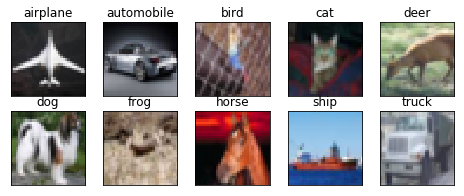

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [15]:
print(num_classes)

10


In [57]:
# Define the model
model = Sequential()

model.add(Convolution2D(48, (3, 3), border_mode='same', input_shape=(32, 32, 3))) #32 as we are using border_mode = 'same' we won't start with 30
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(48, (3, 3) , border_mode='same')) # 32
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # 15

model.add(Convolution2D(48, (1, 1), border_mode='same')) #16
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(96, (3, 3), border_mode='same')) #16
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Convolution2D(192, (3, 3), border_mode='same')) #16
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) #6

model.add(Convolution2D(96, (1, 1), border_mode='same')) #16
model.add(Activation('relu'))


model.add(Convolution2D(96, (3, 3), border_mode='same')) #8
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Convolution2D(192, (3, 3), border_mode='same')) #8
model.add(Activation('relu'))
model.add(Dropout(0.25))

#model.add(MaxPooling2D(pool_size=(2, 2))) #3

model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 1), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_137 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_77 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 32, 32, 48)        20784     
_________________________________________________________________
activation_138 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 16, 16, 48)        2352      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=25)`
  if sys.path[0] == '':


Epoch 1/25
390/390 [==============================] - 16s 42ms/step - loss: 1.6906 - acc: 0.3814 - val_loss: 1.3327 - val_acc: 0.5223
Epoch 2/25
390/390 [==============================] - 14s 35ms/step - loss: 1.2228 - acc: 0.5621 - val_loss: 1.0926 - val_acc: 0.6101
Epoch 3/25
390/390 [==============================] - 14s 35ms/step - loss: 1.0258 - acc: 0.6344 - val_loss: 0.9342 - val_acc: 0.6748
Epoch 4/25
390/390 [==============================] - 14s 35ms/step - loss: 0.9043 - acc: 0.6796 - val_loss: 0.8830 - val_acc: 0.6854
Epoch 5/25
390/390 [==============================] - 14s 35ms/step - loss: 0.8170 - acc: 0.7129 - val_loss: 0.7787 - val_acc: 0.7304
Epoch 6/25
390/390 [==============================] - 14s 35ms/step - loss: 0.7489 - acc: 0.7350 - val_loss: 0.7116 - val_acc: 0.7550
Epoch 7/25
390/390 [==============================] - 14s 35ms/step - loss: 0.6877 - acc: 0.7573 - val_loss: 0.6904 - val_acc: 0.7670
Epoch 8/25
390/390 [==============================] - 14s 35ms

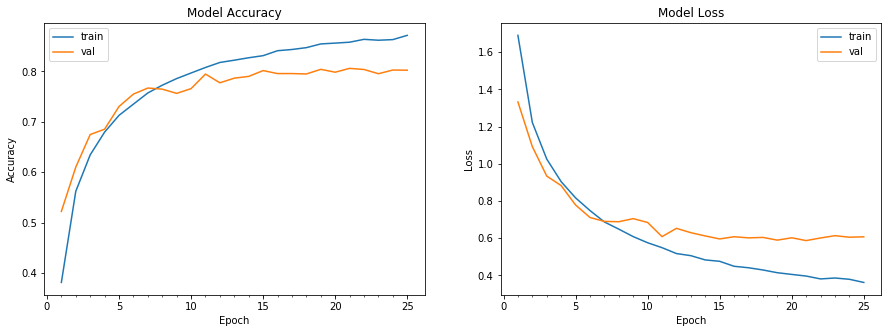

Accuracy on test data is: 80.24


In [59]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 25, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))